# Import Library dan Baca Data

In [116]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [117]:
share_cons = pd.read_csv('dataset/share-elec-by-source.csv')
share_cons = share_cons[share_cons['Entity'] == 'Indonesia']
share_cons = share_cons.drop('Code', axis=1)
share_cons.reset_index(drop=True, inplace=True)
share_cons.columns = share_cons.columns.str.replace(' - % electricity', '')
share_cons = share_cons.fillna(0)
share_cons = share_cons.drop('Entity', axis=1)
share_cons['Year'] = pd.to_datetime(share_cons['Year'], format='%Y')
share_cons

,Year,Coal,Gas,Hydro,Solar,Wind,Oil,Nuclear,Other renewables excluding bioenergy,Bioenergy
0,1985-01-01,31.84,11.09,16.90,0.00,0.00,40.17,0.00,0.00,0.00
1,1986-01-01,29.05,10.11,24.19,0.00,0.00,36.65,0.00,0.00,0.00
2,1987-01-01,29.84,10.39,22.12,0.00,0.00,37.65,0.00,0.00,0.00
3,1988-01-01,30.54,10.63,20.29,0.00,0.00,38.53,0.00,0.00,0.00
4,1989-01-01,29.87,10.40,22.05,0.00,0.00,37.69,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
33,2018-01-01,56.38,20.24,7.63,0.03,0.07,6.33,0.00,5.05,4.27
34,2019-01-01,59.06,21.09,7.16,0.04,0.16,3.58,0.00,4.78,4.12
35,2020-01-01,61.98,17.57,8.34,0.06,0.16,2.32,0.00,5.34,4.23
36,2021-01-01,61.40,18.27,7.98,0.06,0.14,2.16,0.00,5.14,4.84


In [118]:
cons_source = pd.read_csv('dataset/energy-consumption-by-source-and-country.csv')
cons_source = cons_source[cons_source['Entity'] == 'Indonesia']
cons_source = cons_source.drop('Code', axis=1)
cons_source.columns = cons_source.columns.str.replace(' - TWh', '')
cons_source.reset_index(drop=True, inplace=True)
cons_source = cons_source.drop('Entity', axis=1)
cons_source = cons_source.fillna(0)
cons_source['Year'] = pd.to_datetime(cons_source['Year'], format='%Y')
cons_source

,Year,Other renewables (including geothermal and biomass),Biofuels consumption,Solar consumption,Wind consumption,Hydro consumption,Nuclear consumption,Gas consumption,Coal consumption,Oil consumption
0,1965-01-01,0.00,0.00,0.00,0.00,5.40,0.00,5.08,1.50,72.54
1,1966-01-01,0.00,0.00,0.00,0.00,7.02,0.00,5.18,1.84,69.86
2,1967-01-01,0.00,0.00,0.00,0.00,7.88,0.00,6.32,1.29,67.40
3,1968-01-01,0.00,0.00,0.00,0.00,9.74,0.00,6.42,0.97,71.30
4,1969-01-01,0.00,0.00,0.00,0.00,10.18,0.00,12.11,1.16,76.33
...,...,...,...,...,...,...,...,...,...,...
53,2018-01-01,75.27,35.05,0.24,0.50,57.24,0.00,445.29,655.73,874.40
54,2019-01-01,74.55,59.20,0.31,1.28,55.78,0.00,439.99,801.23,852.24
55,2020-01-01,78.70,77.74,0.45,1.25,63.88,0.00,375.18,765.38,750.04
56,2021-01-01,87.73,86.05,0.50,1.14,64.62,0.00,370.81,763.23,780.86


In [119]:
fig1 = px.line(share_cons, x='Year', y=share_cons.columns[2:], title='Data Deret Waktu')
fig1.update_yaxes(title_text="Persentase")
fig2 = px.line(cons_source, x='Year', y=cons_source.columns[2:], title='Data Deret Waktu')
fig2.update_yaxes(title_text="Twh")
fig1.show()
fig2.show()

# Persiapan ARIMA

In [120]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(share_cons['Other renewables excluding bioenergy'].dropna())
print('ADF Statistic: %f' % result[0])
if result[1] <= 0.05:
    print('p-value: %f' % result[1])
    print('Data stationary')
else:
    print('p-value: %f' % result[1])
    print('Data tidak stationary')

ADF Statistic: -1.316480
p-value: 0.621599
Data tidak stationary


In [121]:
# Melakukan differencing pada data
stationary_data = share_cons['Other renewables excluding bioenergy'].diff().dropna()
result = adfuller(stationary_data)
print('ADF Statistic: %f' % result[0])
if result[1] <= 0.05:
    print('p-value: %f' % result[1])
    print('Data stationary')
else:
    print('p-value: %f' % result[1])
    print('Data tidak stationary')

ADF Statistic: -5.699303
p-value: 0.000001
Data stationary


# ARIMA

                                        SARIMAX Results                                         
Dep. Variable:     Other renewables excluding bioenergy   No. Observations:                   37
Model:                                   ARIMA(3, 1, 0)   Log Likelihood                 -53.557
Date:                                  Sat, 11 May 2024   AIC                            115.113
Time:                                          13:33:51   BIC                            121.447
Sample:                                               0   HQIC                           117.324
                                                   - 37                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6528      0.111     -5.867      0.000      -0.871

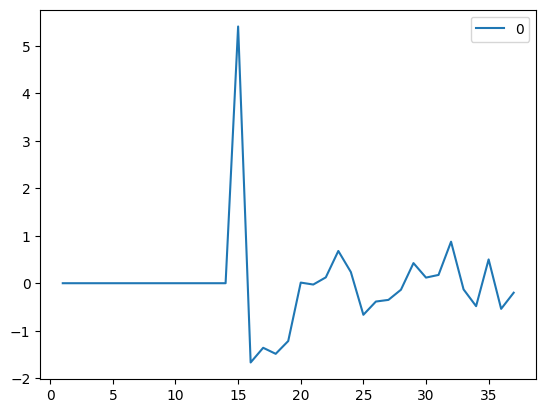

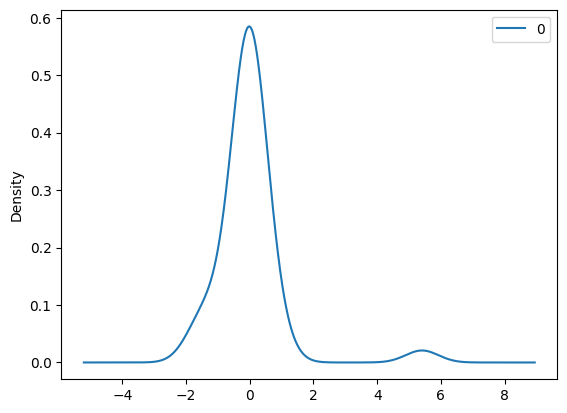

          0
count 37.00
mean  -0.00
std    1.06
min   -1.67
25%   -0.20
50%    0.00
75%    0.01
max    5.41


In [127]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot

model = ARIMA(stationary_data, order=(3,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# summary stats of residuals
print(residuals.describe())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=125.045, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=118.279, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=123.045, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=117.728, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=117.113, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=115.113, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=115.728, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 0.759 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   N

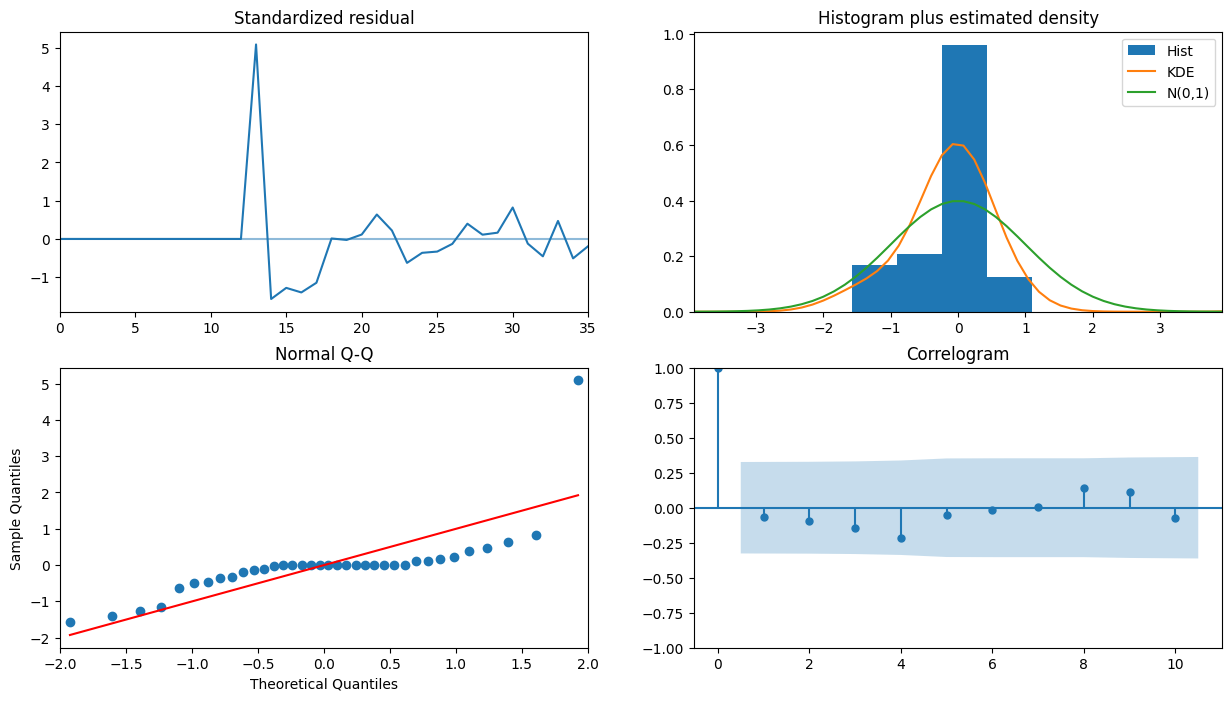

In [122]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(stationary_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [124]:
# Jumlah total data yang ingin Anda gunakan untuk pelatihan
train_size = int(len(stationary_data) * 0.8)  # Misalnya, 80% data untuk pelatihan

# Memisahkan data menjadi data pelatihan dan data uji
train_data = stationary_data[:train_size]
test_data = stationary_data[train_size:]

# Menampilkan panjang data pelatihan dan data uji
print("Jumlah data pelatihan:", len(train_data))
print("Jumlah data uji:", len(test_data))

Jumlah data pelatihan: 29
Jumlah data uji: 8


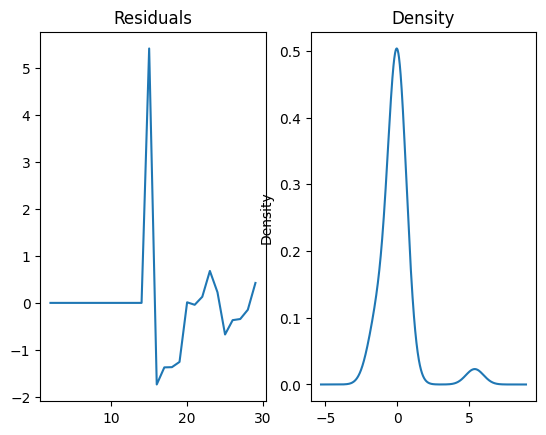

In [128]:
import matplotlib.pyplot as plt
residuals = fitted.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

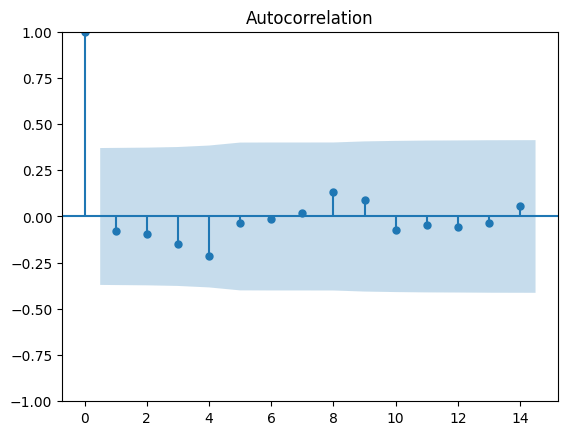

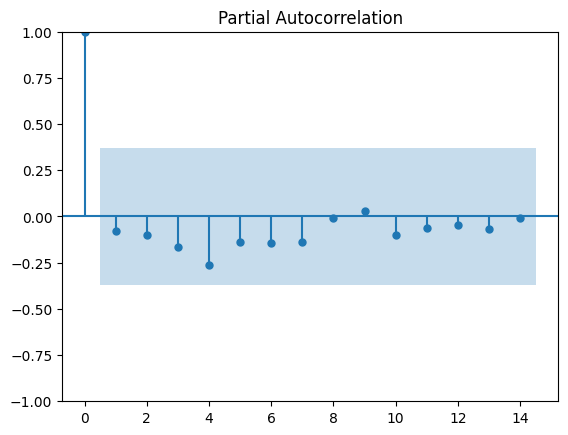

In [129]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

# Forrecasting anying gagal teros

In [130]:
arima_pred = fitted.predict(start = len(train_data), end = len(stationary_data)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

29   -0.21
30   -0.21
31   -0.21
32   -0.14
33   -0.19
34   -0.18
35   -0.18
36   -0.17
Name: ARIMA Predictions, dtype: float64

In [131]:
test_data

30   -0.10
31    0.00
32    0.77
33    0.14
34   -0.27
35    0.56
36   -0.19
37   -0.14
Name: Other renewables excluding bioenergy, dtype: float64

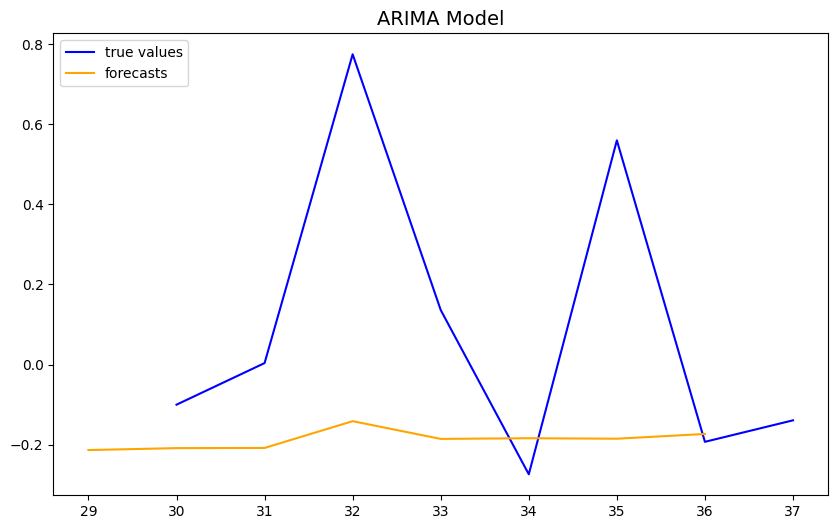

In [132]:
plt.figure(figsize = (10,6))
plt.plot(test_data, label = "true values", color = "blue")
plt.plot(arima_pred,label = "forecasts", color='orange')
plt.title("ARIMA Model", size = 14)
plt.legend(loc = 'upper left')
plt.show()

In [134]:
test_data = pd.DataFrame({'Actual': test_data, 'Predicted': arima_pred})
test_data

,Actual,Predicted
29,NaN,-0.21
30,-0.10,-0.21
31,0.00,-0.21
32,0.77,-0.14
33,0.14,-0.19
34,-0.27,-0.18
35,0.56,-0.18
36,-0.19,-0.17
37,-0.14,NaN
ARIMA_Predictions,"29 -0.21 30 -0.21 31 -0.21 32 -0.14 33 -0.19 34 -0.18 35 -0.18 36 -0.17 Name: ARIMA Predictions, dtype: float64",NaN


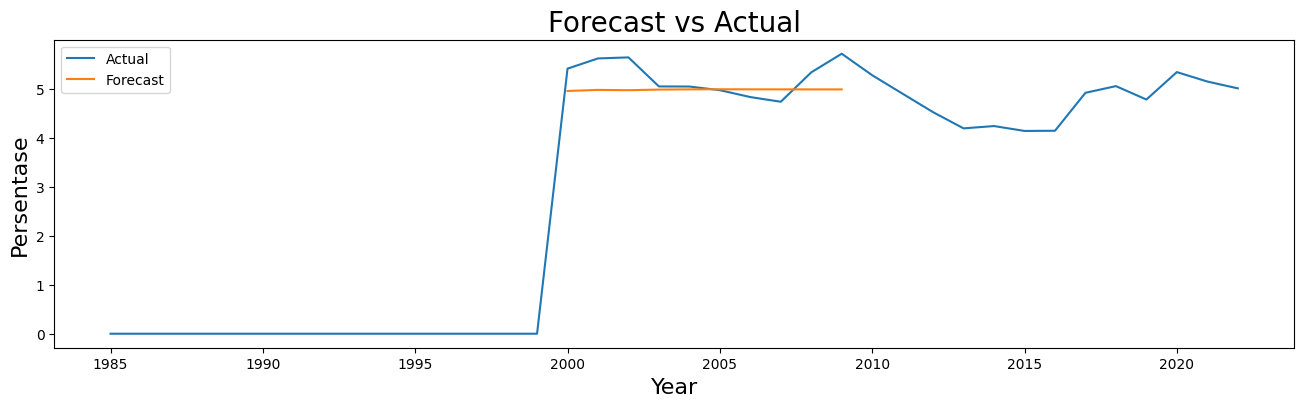

In [ ]:
# Lakukan forecasting untuk 10 tahun ke depan
forecast = model_fit.forecast(steps=10)

# Visualisasikan forecasting
plt.figure(figsize=(16,4))
plt.plot(share_cons['Year'], share_cons['Other renewables excluding bioenergy'], label='Actual')
plt.plot(range(2000, 2010), forecast, label='Forecast')
plt.title('Forecast vs Actual', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Persentase', fontsize=16)
plt.legend()
plt.show()

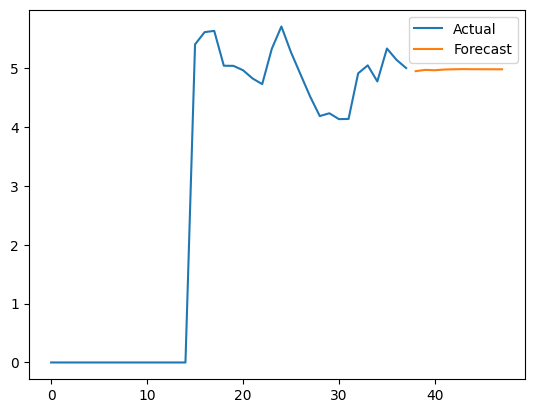

In [ ]:
# Lakukan prediksi dan plot
forecast = model_fit.forecast(steps=10)
plt.plot(share_cons['Other renewables excluding bioenergy'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()